In [1]:
import pandas as pd
# Load the dataset with ISO-8859-1 encoding
data = pd.read_excel("/content/fix_final.xlsx")
data.head()

,source,author,title,description,url,urlToImage,publishedAt,full_content,sentiment_score,Senti,party
0,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera Staff,India election 2024: Why isnâ€™t Modiâ€™s BJP ...,Absence of the prime minister's party from ele...,https://www.aljazeera.com/news/2024/5/13/india...,https://www.aljazeera.com/wp-content/uploads/2...,2024-05-13T04:56:59Z,The absence of the prime ministerâ€™s party fr...,0.9631,Positive,PDP
1,"{'id': 'al-jazeera-english', 'name': 'Al Jazee...",Al Jazeera Staff,India Lok Sabha election 2024 Phase 4: Who vot...,People from across 10 states and union territo...,https://www.aljazeera.com/news/2024/5/12/india...,https://www.aljazeera.com/wp-content/uploads/2...,2024-05-12T05:12:01Z,A total of 96 constituencies across 10 states ...,0.5673,Positive,BJP
2,"{'id': 'rt', 'name': 'RT'}",RT,Indian capital heads to the polls,Delhi goes to the polls as Indiaâ€™s election ...,https://www.rt.com/india/598233-delhi-phase-el...,https://mf.b37mrtl.ru/files/2024.05/article/66...,2024-05-25T11:51:47Z,The sixth phase of voting in Indiaâ€™s seven-p...,0.9449,Positive,BJP
3,"{'id': 'rt', 'name': 'RT'}",RT,Trans Democracy: Five transgender candidates i...,Non-binaries existed in Indian mythology and a...,https://www.rt.com/india/597965-five-transgend...,https://mf.b37mrtl.ru/files/2024.05/article/66...,2024-05-22T03:33:39Z,In the ongoing seven-phase parliamentary elect...,0.9947,Positive,BJP
4,"{'id': None, 'name': 'BusinessLine'}",PTI,Lok Sabha elections phase 6: Voting underway i...,Voting begins in 58 constituencies across Indi...,https://www.thehindubusinessline.com/news/elec...,https://bl-i.thgim.com/public/incoming/utleux/...,2024-05-25T03:41:43Z,Get businessline apps on\nConnect with us\nTO ...,0.9685,Positive,BJP


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           213 non-null    object 
 1   author           183 non-null    object 
 2   title            213 non-null    object 
 3   description      213 non-null    object 
 4   url              213 non-null    object 
 5   urlToImage       185 non-null    object 
 6   publishedAt      213 non-null    object 
 7   full_content     213 non-null    object 
 8   sentiment_score  211 non-null    float64
 9   Senti            213 non-null    object 
 10  party            211 non-null    object 
dtypes: float64(1), object(10)
memory usage: 18.4+ KB


In [3]:
data.isnull().sum()


,0
source,0
author,30
title,0
description,0
url,0
urlToImage,28
publishedAt,0
full_content,0
sentiment_score,2
Senti,0


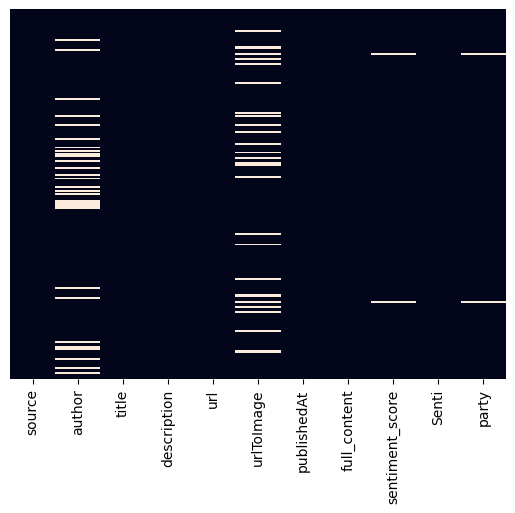

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(),yticklabels=False,cbar=False)
plt.show()

Summarizing the Numerical and Categorical Features

In [5]:
# Summary of numerical features
numerical_summary = data.describe()

# Summary of categorical features
categorical_summary = data.describe(include=['object'])

numerical_summary, categorical_summary


(       sentiment_score
 count       211.000000
 mean          0.739115
 std           0.590863
 min          -0.997400
 25%           0.947350
 50%           0.987900
 75%           0.997200
 max           1.000000,
                                                    source     author  \
 count                                                 213        183   
 unique                                                 31         60   
 top     {'id': 'the-times-of-india', 'name': 'The Time...  ET Online   
 freq                                                   60         32   
 
                                                     title        description  \
 count                                                 213                213   
 unique                                                156                160   
 top     Lok Sabha Elections 2024 voter turnout: 10.8% ...  Letters to Editor   
 freq                                                    4                  4   
 
         

Visualizing the Distribution of the Target Variable

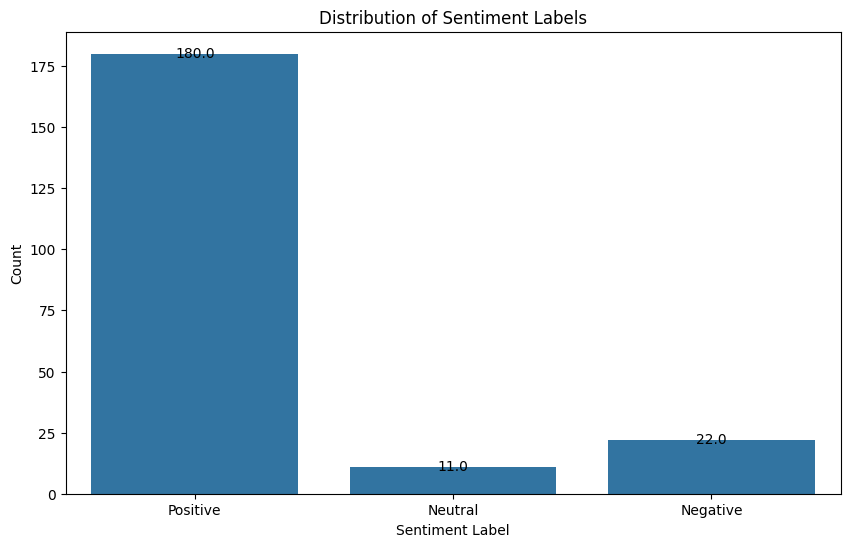

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Senti', data=data)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')

# Adding the count labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha='center', va='center')

plt.show()


Visualizing the Distribution of Key Features

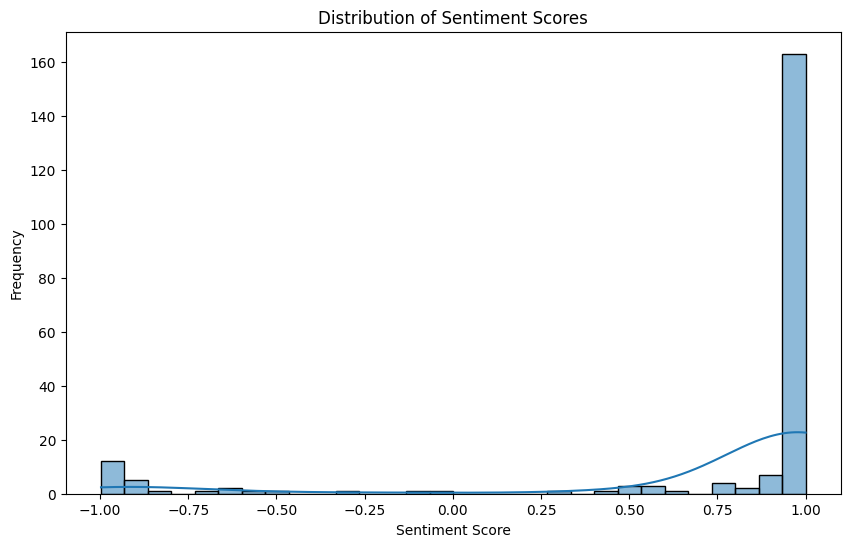

In [7]:
# Visualize the distribution of sentiment_score
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment_score'], bins=30, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

Checking for Class Imbalance in the Target Variable

In [8]:
# Check for class imbalance
class_counts = data['Senti'].value_counts()
print(class_counts)
classes=data['Senti'].value_counts().index
classes


Senti
Positive    180
Negative     22
Neutral      11
Name: count, dtype: int64


Index(['Positive', 'Negative', 'Neutral'], dtype='object', name='Senti')

piechart

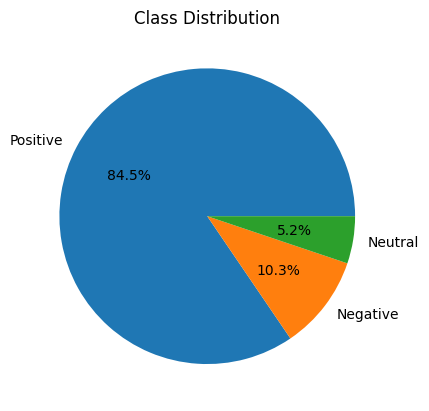

In [9]:
plt.pie(class_counts.values, labels=classes, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

Average score for each category

In [10]:
data.groupby(['Senti'])['sentiment_score'].mean()

,sentiment_score
Senti,
Negative,-0.890155
Neutral,0.147611
Positive,0.967823


Filling Missing values

In [11]:
# Fill null values in col1 with user-defined value
data['author'].fillna("NA", inplace=True)

# Fill null values in col2 with user-defined value
data['urlToImage'].fillna("NA", inplace=True)

data['url'].fillna("NA", inplace=True)

data['title'].fillna("NA", inplace=True)

data['publishedAt'].fillna("NA", inplace=True)

# Replace missing values in `sentiment_score` with the mean of the column
data['sentiment_score'].fillna(data['sentiment_score'].mean(), inplace=True)

# Replace missing values in `sentiment_label` with the mode of the column
data['Senti'].fillna(data['Senti'].mode()[0], inplace=True)

# Replace missing values in `party` with the mode of the column
data['party'].fillna(data['party'].mode()[0], inplace=True)

data.dropna(subset=['full_content'], inplace=True)
data.isnull().sum()

<ipython-input-11-71fa1be253ba>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['author'].fillna("NA", inplace=True)
<ipython-input-11-71fa1be253ba>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,0
source,0
author,0
title,0
description,0
url,0
urlToImage,0
publishedAt,0
full_content,0
sentiment_score,0
Senti,0


Importing Libraries

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score

In [13]:
# Handle missing values (drop rows with missing target or input features)
# data = data.dropna(subset=['Senti', 'title', 'description', 'full_content', 'sentiment_score'])

In [14]:
# Encode the target variable
label_encoder = LabelEncoder()
data['sentiment_label_encoded'] = label_encoder.fit_transform(data['Senti'])


In [15]:
print(data[['sentiment_label_encoded', 'sentiment_score']].head(100))
label_counts = data['sentiment_label_encoded'].value_counts()
print(label_counts)
print(data['sentiment_label_encoded'].unique())


    sentiment_label_encoded  sentiment_score
0                         2           0.9631
1                         2           0.5673
2                         2           0.9449
3                         2           0.9947
4                         2           0.9685
..                      ...              ...
95                        2           0.9901
96                        2           0.9959
97                        2           0.9932
98                        2           0.9998
99                        2           0.9960

[100 rows x 2 columns]
sentiment_label_encoded
2    180
0     22
1     11
Name: count, dtype: int64
[2 1 0]


In [16]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [17]:

# Feature engineering
data['text'] = data['title'] + ' ' + data['description'] + ' ' + data['full_content']

In [18]:
# Check class distribution
print(data['Senti'].value_counts())


Senti
Positive    180
Negative     22
Neutral      11
Name: count, dtype: int64


In [19]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['Senti'], test_size=0.2, random_state=42, stratify=data['Senti'])


In [20]:
# Text vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [21]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [22]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced')
}


Classifier: Logistic Regression
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80         5
     Neutral       1.00      0.50      0.67         2
    Positive       0.97      1.00      0.99        36

    accuracy                           0.95        43
   macro avg       0.92      0.77      0.82        43
weighted avg       0.95      0.95      0.95        43

--------------------------------------------------------------------------------


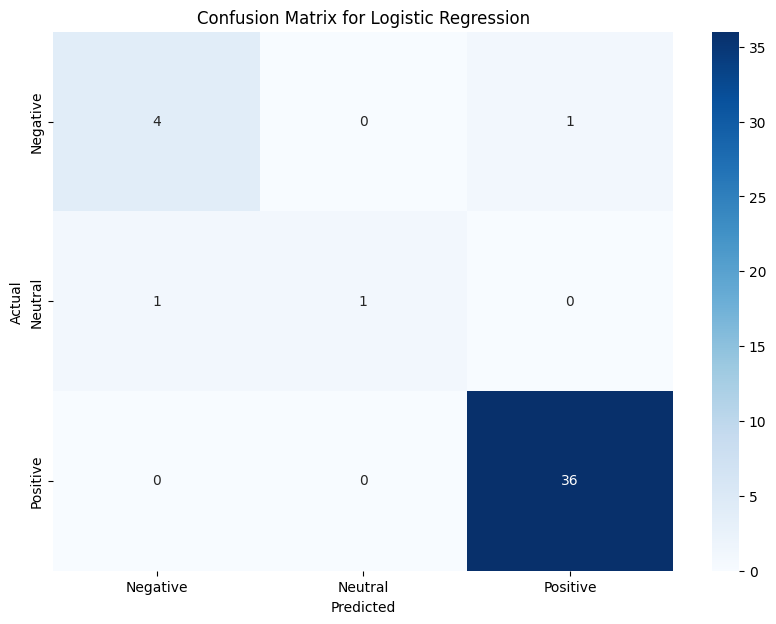

----------------------------------------------------------------------------------------------------
Classifier: Naive Bayes
Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00         2
    Positive       0.84      1.00      0.91        36

    accuracy                           0.84        43
   macro avg       0.28      0.33      0.30        43
weighted avg       0.70      0.84      0.76        43

--------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


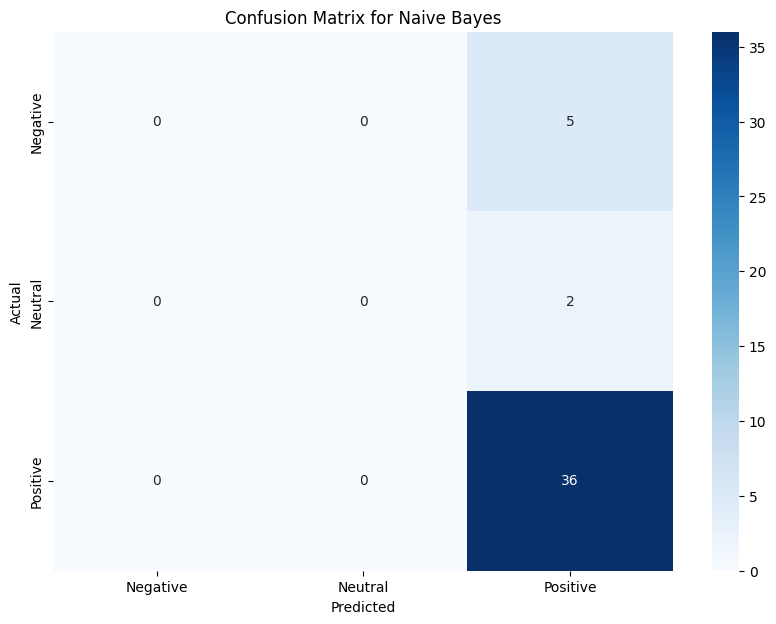

----------------------------------------------------------------------------------------------------
Classifier: SVM
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

    Negative       1.00      0.80      0.89         5
     Neutral       1.00      0.50      0.67         2
    Positive       0.95      1.00      0.97        36

    accuracy                           0.95        43
   macro avg       0.98      0.77      0.84        43
weighted avg       0.96      0.95      0.95        43

--------------------------------------------------------------------------------


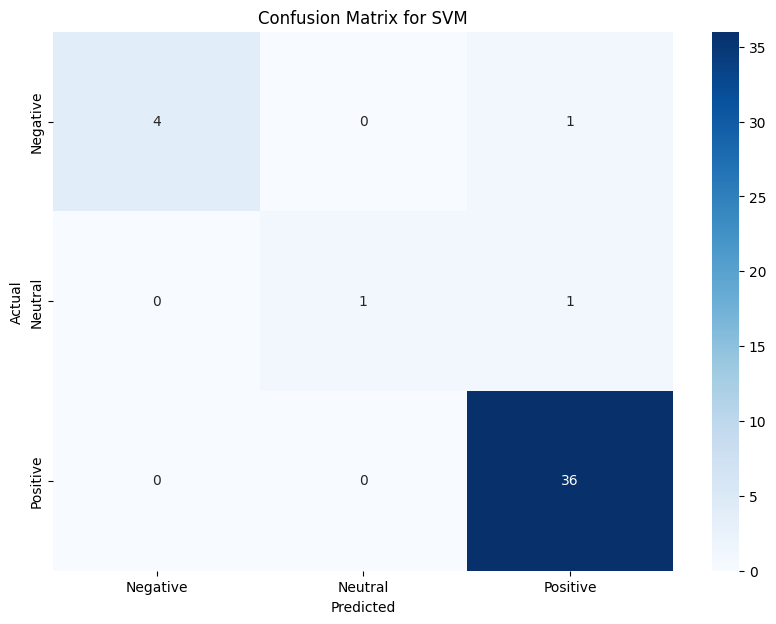

----------------------------------------------------------------------------------------------------
Classifier: Decision Tree
Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

    Negative       0.33      0.20      0.25         5
     Neutral       1.00      0.50      0.67         2
    Positive       0.87      0.94      0.91        36

    accuracy                           0.84        43
   macro avg       0.74      0.55      0.61        43
weighted avg       0.82      0.84      0.82        43

--------------------------------------------------------------------------------


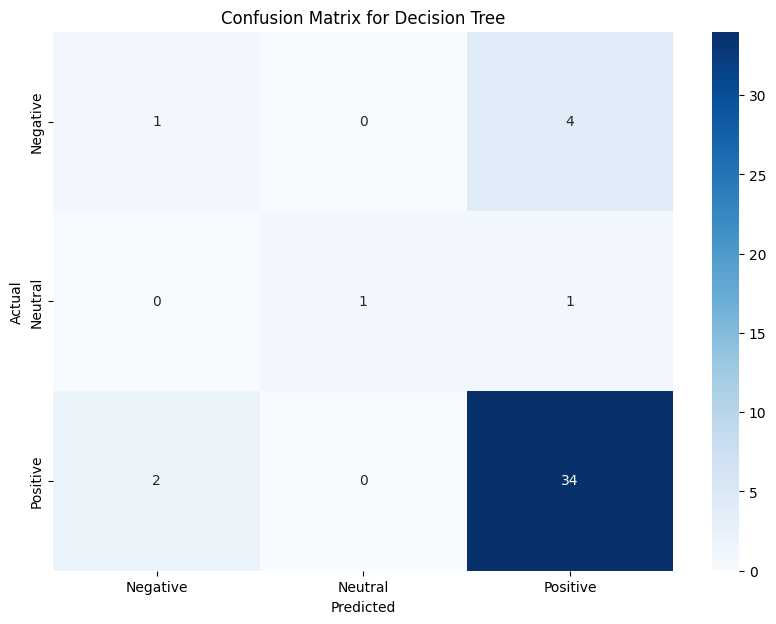

----------------------------------------------------------------------------------------------------
Classifier: Random Forest
Accuracy: 0.9069767441860465
              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57         5
     Neutral       1.00      0.50      0.67         2
    Positive       0.90      1.00      0.95        36

    accuracy                           0.91        43
   macro avg       0.97      0.63      0.73        43
weighted avg       0.92      0.91      0.89        43

--------------------------------------------------------------------------------


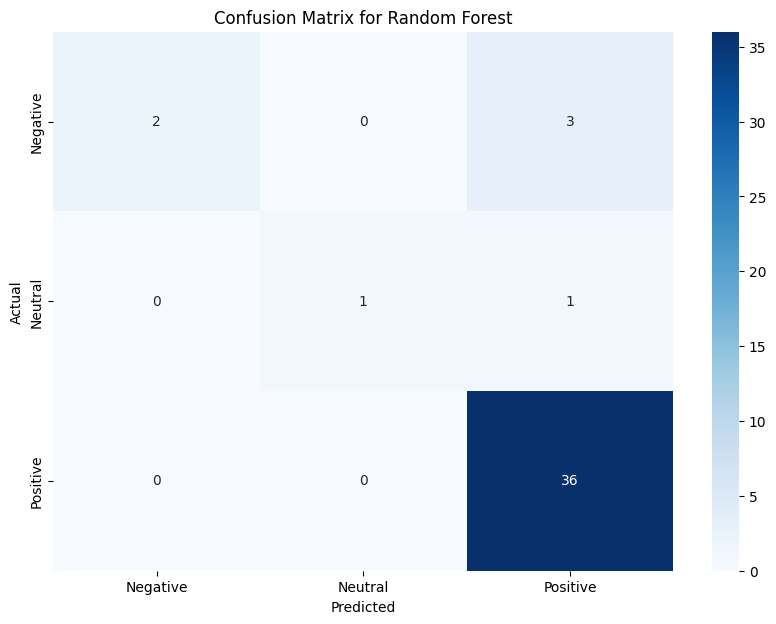

----------------------------------------------------------------------------------------------------


In [23]:
# Train and evaluate classifiers
for name, clf in classifiers.items():
    print(f'Classifier: {name}')
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(report)
    print('-' * 80)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print("-" * 100)
